### Get normed mean market path

In [2]:
using TimeData
using Econometrics

In [44]:
prices = EconDatasets.dataset("SP500");
pll = prices[:PLL]

,idx,PLL
1,1962-01-02,NA
2,1962-01-03,NA
3,1962-01-04,NA
4,1962-01-05,NA
5,1962-01-08,NA
6,1962-01-09,NA
7,1962-01-10,NA
8,1962-01-11,NA
9,1962-01-12,NA
10,1962-01-15,NA


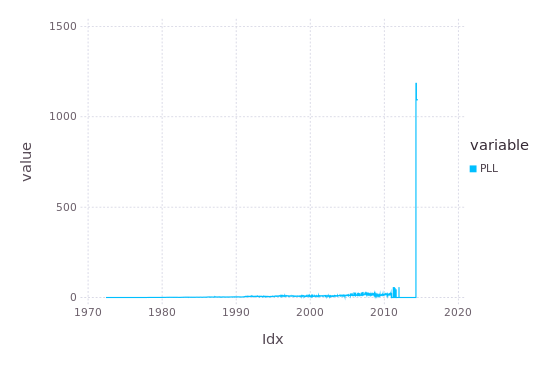

In [45]:
gdfPlot(pll)

In [3]:
normedPrices = readTimedata("../underdispersion_data/normedPrices.csv");

In [25]:
logRets = price2ret(normedPrices, log=true).*100
(nObs, nAss) = size(logRets)

(13314,502)

In [26]:
data = asArr(normedPrices, Float64, NaN)

13315x502 Array{Float64,2}:
 NaN        NaN        NaN         …  NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN         …  NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN         …  NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
 NaN        NaN        NaN            NaN        NaN        NaN        
   ⋮                               ⋱

In [12]:
using Winston

In [15]:
maximum(data), minimum(data)

(9.554276183299862,-5.3785207960927215)

In [46]:
coreRets = asArr(logRets, Float64, NaN)

meanVals = Array(Float64, nObs)
for ii=1:nObs
    rowVals = coreRets[ii, :]
    if sum(!isnan(rowVals)) > 5
        meanVals[ii] = mean(rowVals[!isnan(rowVals)])
    else
        meanVals[ii] = 0
    end
end

In [18]:
loadPlotting()

wstHist (generic function with 4 methods)

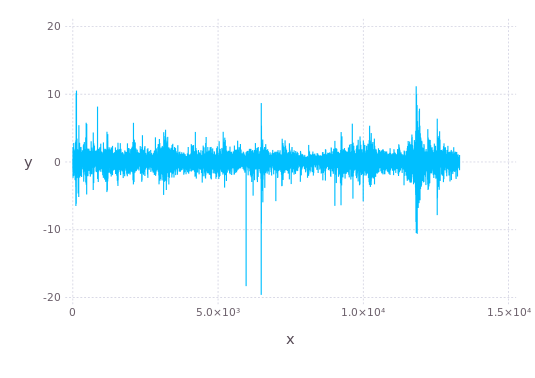

In [47]:
Gadfly.plot(x=1:nObs, y=meanVals, Gadfly.Geom.line)

In [31]:
ind = findfirst(meanVals .> 50)
vals = coreRets[ind, :]
vals[!isnan(vals)]

1-element Array{Float64,1}:
 57.7252

In [41]:
logRets[ind, :]

,idx,MMM,ABT,ABBV,ACE
1,2002-02-18,NA,NA,NA,NA


In [37]:
find(!isnan(vals))

1-element Array{Int64,1}:
 349

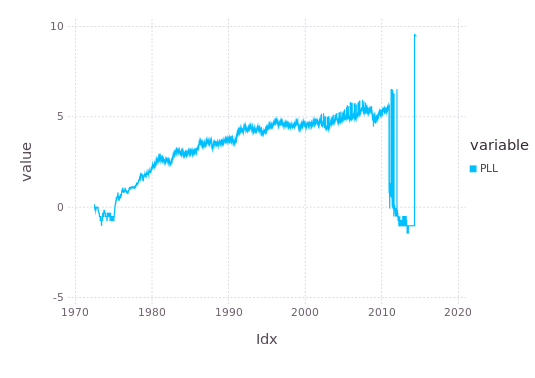

In [40]:
gdfPlot(normedPrices[:, 349])

In [38]:
logRets[:, 349]

,idx,PLL
1,1962-01-03,NA
2,1962-01-04,NA
3,1962-01-05,NA
4,1962-01-08,NA
5,1962-01-09,NA
6,1962-01-10,NA
7,1962-01-11,NA
8,1962-01-12,NA
9,1962-01-15,NA
10,1962-01-16,NA


In [35]:
[get(logRets[ind, :], 1, ii) for ii=1:nAss]

502-element Array{Any,1}:
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 ⋮ 
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA
 NA

In [14]:
logRetsFloat = asArr(logRets, Float64, NaN)

nObs = size(logRetsFloat, 1)
meanMarketRets = zeros(nObs)

rowMean = x -> mean(x[!isnan(x)])

for ii=1:nObs
    meanMarketRets[ii] = rowMean(logRetsFloat[ii, :])
end

meanMarketRets

13314-element Array{Float64,1}:
  0.0043921  
  2.47374e-5 
 -0.0116549  
 -0.00873106 
  0.00402252 
  0.00417948 
  0.0220178  
 -0.0233823  
 -0.00628188 
  0.00443164 
 -0.0116824  
  0.00341907 
  0.0161124  
  ⋮          
  0.00577809 
  0.0        
 -0.00584624 
 -0.00624578 
  0.00451723 
 -0.00484448 
  0.000612183
  0.00318318 
 -0.00246981 
  0.00359089 
 -0.0121466  
  0.0102366  

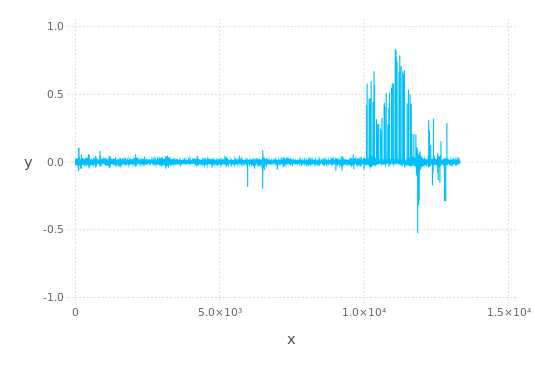

In [20]:
Gadfly.plot(x=[1:size(meanMarketRets, 1)], y=meanMarketRets, Gadfly.Geom.line)

In [15]:
meanMarketRetsTm = Timematr(meanMarketRets, [:meanRet], idx(logRets))
meanMarketPrices = Timematr(cumsum(meanMarketRets), [:meanMarket], idx(logRets))

,idx,meanRet
1,1962-01-03,0.004
2,1962-01-04,0.0
3,1962-01-05,-0.012
4,1962-01-08,-0.009
5,1962-01-09,0.004
6,1962-01-10,0.004
7,1962-01-11,0.022
8,1962-01-12,-0.023
9,1962-01-15,-0.006
10,1962-01-16,0.004


In [16]:
loadPlotting()

wstHist (generic function with 4 methods)

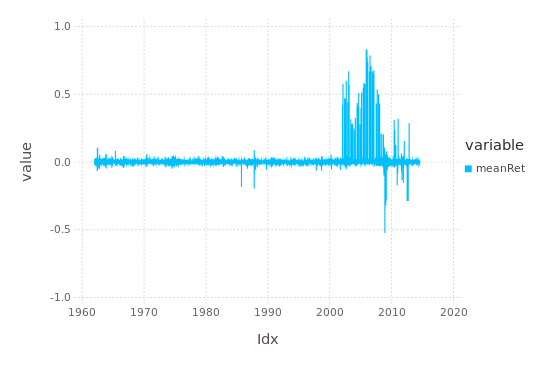

In [17]:
gdfPlot(meanMarketRetsTm)

In [21]:
prices = ret2price(meanMarketRetsTm, log=true)

,idx,meanRet
1,1962-01-02,0.0
2,1962-01-03,0.004
3,1962-01-04,0.004
4,1962-01-05,-0.007
5,1962-01-08,-0.016
6,1962-01-09,-0.012
7,1962-01-10,-0.008
8,1962-01-11,0.014
9,1962-01-12,-0.009
10,1962-01-15,-0.015


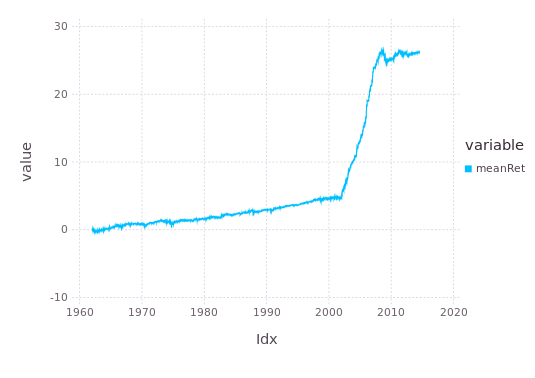

In [22]:
gdfPlot(prices)

In [ ]:
gdfPlot(normedPrices)